<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong>
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Convolutional Neural Networks for Image Classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
type(mnist.load_data())

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


tuple

In [4]:
mnist.load_data()[0][0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [5]:
mnist.load_data()[0][0][0].shape

(28, 28)

In [6]:
mnist.load_data()[0][0].ndim

3

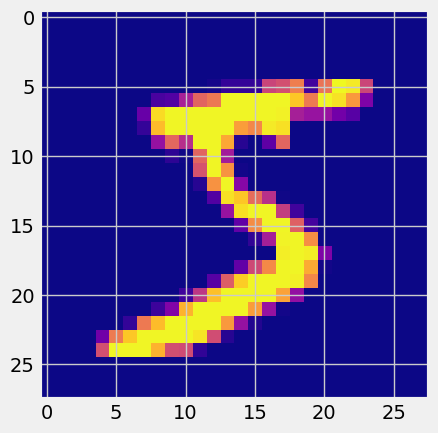

In [7]:
plt.style.use("fivethirtyeight")
plt.imshow(mnist.load_data()[0][0][0] , cmap ="plasma")
plt.show()

In [8]:
from tensorflow.keras.datasets import mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
y_test.shape

(10000,)

##  Visualizing the Image Data

In [13]:
single_image = X_train[0]
#it is the same as mnist.load_data()[0][0][0]

In [14]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [15]:
single_image.shape

(28, 28)

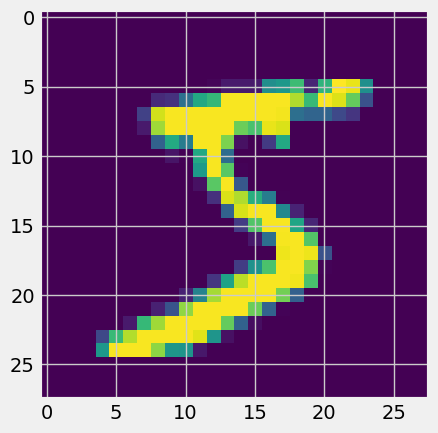

In [16]:
plt.imshow(single_image) # plt.imshow can only display a 2-dimensional image.
plt.show()

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train.shape

(60000,)

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
y_test.shape

(10000,)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [21]:
from tensorflow.keras.utils import to_categorical

In [ ]:
help(to_categorical)

Help on function to_categorical in module keras.src.utils.numerical_utils:

to_categorical(x, num_classes=None)
    Converts a class vector (integers) to binary class matrix.

    E.g. for use with `categorical_crossentropy`.

    Args:
        x: Array-like with class values to be converted into a matrix
            (integers from 0 to `num_classes - 1`).
        num_classes: Total number of classes. If `None`, this would be inferred
            as `max(x) + 1`. Defaults to `None`.

    Returns:
        A binary matrix representation of the input as a NumPy array. The class
        axis is placed last.

    Example:

    >>> a = keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
    >>> print(a)
    [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

    >>> b = np.array([.9, .04, .03, .03,
    ...               .3, .45, .15, .13,
    ...               .04, .01, .94, .05,
    ...               .12, .21, .5, .17]).reshape(4,4)
    >>> loss = keras.ops.categor

In [22]:
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_test.shape

(10000, 10)

In [23]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_train.shape

(60000, 10)

In [25]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Processing X Data

We should normalize the X data

In [26]:
single_image.max()

np.uint8(255)

In [27]:
single_image.min()

np.uint8(0)

In [28]:
single_image.max() - single_image.min()

np.uint8(255)

In [29]:
X_train = X_train/255
X_test = X_test/255

In [30]:
scaled_single = X_train[0]

In [31]:
scaled_single.max() , scaled_single.min()

(np.float64(1.0), np.float64(0.0))

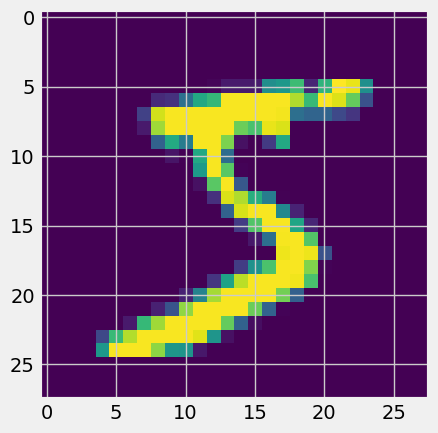

In [32]:
plt.imshow(scaled_single)
plt.show()

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [35]:
X_train = X_train.reshape(60000, 28, 28, 1) # batch_size , width , height , color_channels
X_train.shape

(60000, 28, 28, 1)

In [36]:
X_test = X_test.reshape(10000,28,28,1)
X_test.shape

(10000, 28, 28, 1)

# Training the Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten

In [ ]:
Dense.__init__

<function keras.src.layers.core.dense.Dense.__init__(self, units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, lora_alpha=None, **kwargs)>

In [ ]:
Flatten.__init__

<function keras.src.layers.reshaping.flatten.Flatten.__init__(self, data_format=None, **kwargs)>

In [ ]:
MaxPool2D.__init__

<function keras.src.layers.pooling.max_pooling2d.MaxPooling2D.__init__(self, pool_size=(2, 2), strides=None, padding='valid', data_format=None, name=None, **kwargs)>

In [ ]:
Conv2D.__init__

<function keras.src.layers.convolutional.conv2d.Conv2D.__init__(self, filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)>

In [ ]:
help(compile)

Help on built-in function compile in module builtins:

compile(source, filename, mode, flags=0, dont_inherit=False, optimize=-1, *, _feature_version=-1)
    Compile source into a code object that can be executed by exec() or eval().

    The source code may represent a Python module, statement or expression.
    The filename will be used for run-time error messages.
    The mode must be 'exec' to compile a module, 'single' to compile a
    single (interactive) statement, or 'eval' to compile an expression.
    The flags argument, if present, controls which future statements influence
    the compilation of the code.
    The dont_inherit argument, if true, stops the compilation inheriting
    the effects of any future statements in effect in the code calling
    compile; if absent or false these statements do influence the compilation,
    in addition to any features explicitly specified.



In [38]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters = 32 , kernel_size= (4,4,) , input_shape=(28,28,1) , activation="relu"))

# Pooling Layer:
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten Images from 28 , 28 to 28*28 = 764
model.add(Flatten())

#128 Neurons In dense Hidden Layer
model.add(Dense(units=128 , activation="relu"))

#Last Layer in the classifier, thus 10 possible classes
model.add(Dense(units=10 , activation="softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"]) # we can add in additional metrics https://keras.io/metrics/

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor="val_loss" , patience = 1)

## Train the Model

In [42]:
model.fit(X_train,
          y_cat_train,
          epochs=5,
          validation_data=(X_test , y_cat_test),
          #callbacks=[early_stop]
          )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9221 - loss: 0.2651 - val_accuracy: 0.9834 - val_loss: 0.0499
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9854 - loss: 0.0475 - val_accuracy: 0.9867 - val_loss: 0.0412
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9872 - val_loss: 0.0357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9867 - val_loss: 0.0429
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9867 - val_loss: 0.0487


## Evaluate the Model

In [43]:
model.metrics_names

['loss', 'compile_metrics']

In [44]:
model.history.history

{'accuracy': [0.9611666798591614,
  0.9854000210762024,
  0.9902833104133606,
  0.9936000108718872,
  0.9951333403587341],
 'loss': [0.1291985809803009,
  0.04705263301730156,
  0.030057603493332863,
  0.019947869703173637,
  0.014354011043906212],
 'val_accuracy': [0.9833999872207642,
  0.9866999983787537,
  0.9872000217437744,
  0.9866999983787537,
  0.9866999983787537],
 'val_loss': [0.04993512108922005,
  0.0411660335958004,
  0.03568592295050621,
  0.04294782876968384,
  0.04865734651684761]}

In [47]:
model_evaluation = pd.DataFrame(model.history.history)

In [48]:
model_evaluation.head()

,accuracy,loss,val_accuracy,val_loss
0,0.961167,0.129199,0.9834,0.049935
1,0.985400,0.047053,0.9867,0.041166
2,0.990283,0.030058,0.9872,0.035686
3,0.993600,0.019948,0.9867,0.042948
4,0.995133,0.014354,0.9867,0.048657


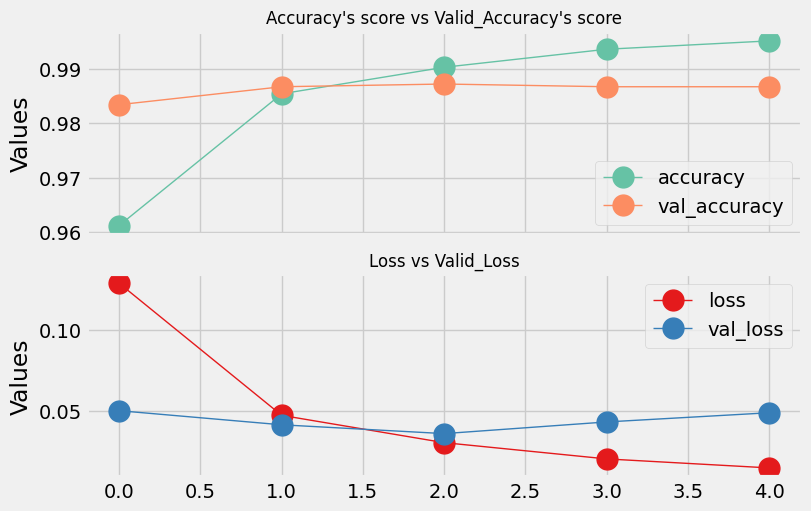

In [49]:
fig , ax = plt.subplots(nrows= 2 , ncols=1 , figsize = (8,5), constrained_layout = True , sharex="all")


ax[0].set_prop_cycle(plt.cycler("color" , plt.cm.Set2.colors))

ax[0].plot(model_evaluation[['accuracy','val_accuracy']], marker = "o", ms = 15, lw = 1)
ax[0].set_title("Accuracy's score vs Valid_Accuracy's score" , fontsize = 12)
ax[0].set_ylabel("Values")
ax[0].legend(['accuracy','val_accuracy'], loc = "best")


ax[1].set_prop_cycle(plt.cycler("color" , plt.cm.Set1.colors))

ax[1].plot(model_evaluation[["loss", "val_loss"]], marker = "o", ms = 15 , lw = 1)
ax[1].set_title("Loss vs Valid_Loss", fontsize = 12)
ax[1].set_ylabel("Values")
ax[1].legend(["loss", "val_loss"], loc = "best")

In [50]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[0.04865734651684761, 0.9866999983787537]


In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [55]:
y_cat_test.shape

(10000, 10)

In [56]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [57]:
predictions[0]

array([1.1540636e-10, 2.1002226e-08, 2.2409723e-07, 2.3937287e-06,
       8.8433280e-12, 2.4761200e-09, 1.2452723e-14, 9.9999720e-01,
       7.7426483e-09, 1.2487362e-07], dtype=float32)

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [61]:
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [63]:
confusion_matrix(y_test,predicted_classes)

array([[ 972,    0,    4,    1,    0,    1,    0,    0,    2,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   0,    2, 1022,    1,    0,    0,    0,    4,    3,    0],
       [   0,    0,    1, 1001,    0,    6,    0,    0,    2,    0],
       [   0,    1,    5,    0,  951,    0,    2,    0,    5,   18],
       [   1,    0,    0,    5,    0,  885,    1,    0,    0,    0],
       [   8,    2,    1,    0,    1,    4,  940,    0,    2,    0],
       [   0,    2,   11,    3,    0,    1,    0, 1005,    1,    5],
       [   1,    1,    2,    2,    0,    0,    0,    1,  964,    3],
       [   0,    2,    1,    2,    2,    8,    0,    0,    1,  993]])

In [ ]:
import seaborn as sns

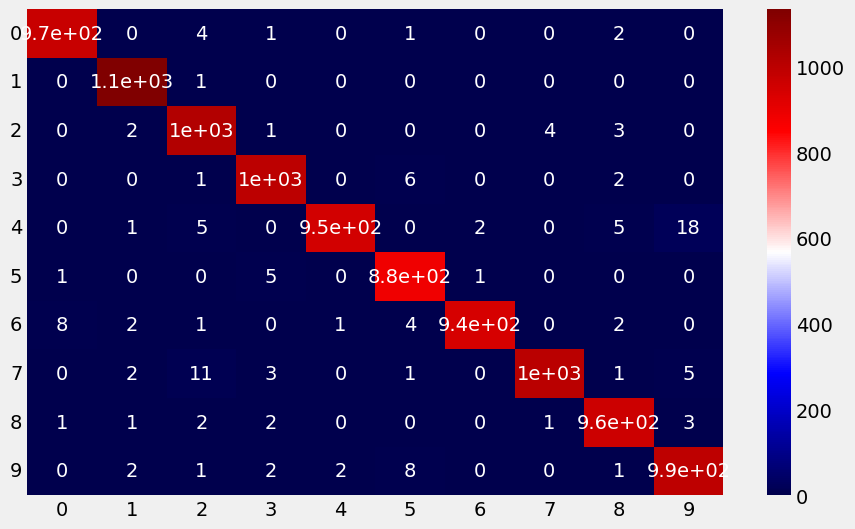

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True, cmap = "seismic")
plt.yticks(rotation = 0)
plt.show()
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [84]:
my_number = X_test[0]

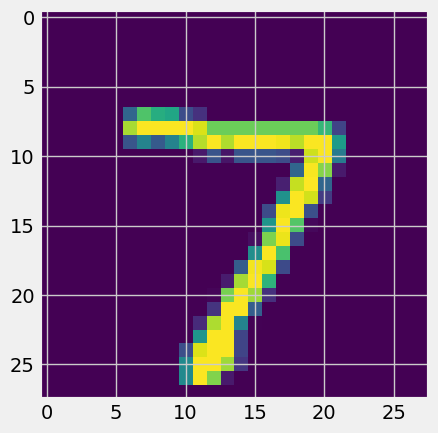

In [77]:
plt.imshow(my_number.reshape(28,28))

In [85]:
# SHAPE --> (num_images,width,height,color_channels)
num_pred = model.predict(my_number.reshape(1,28,28,1))
print(np.around(num_pred,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


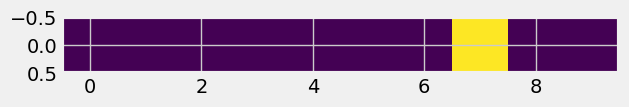

In [82]:
plt.imshow(num_pred)

Looks like the CNN performed quite well!